In [1]:
#%matplotlib notebook
import numpy as np
# 実行時間測定用
import time
# グラフ化用
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib.ticker import ScalarFormatter
import datetime
import pytz

### コードの高速化（numbaによる並列処理）
### https://qiita.com/SatoshiTerasaki/items/00aaf16b0d4a6b4121f5
### https://qiita.com/nabenabe0928/items/a02964d8b48619b1e348
### https://qiita.com/yniji/items/d012bb9f938e0445a3ff

### numpy.randomの使い方
### https://note.nkmk.me/python-numpy-random/

### 試行回数の設定

In [2]:
n_count = 10**8
n_count = int(n_count)

### モンテカルロシミュレーションの実行

In [3]:
# 疑似乱数ジェネレータを初期化して乱数シードを固定
np.random.seed(0)
# 各成分で0~1までの乱数をn_count個生成
# 下記のように多次元配列を用いると試行回数10**10以上でMemoryErrorが発生する
x = np.random.rand(n_count, 3)
# 判定用
R = x[:, 0]+x[:, 1]+x[:, 2]
counter = np.count_nonzero(R < 1)
integrate_result = counter/n_count

In [4]:
integrate_result

0.16666664

In [5]:
# インデックスの取得
index_array = np.where(R < 1)[0]
# インデックスを基に条件に当てはまる要素を元の配列から抽出
result_array = np.array([x[i] for i in index_array])

### 真の値との比較用

In [6]:
true_value = 1/6
#error = true_value-integrate_result
true_value

0.16666666666666666

### グラフ化

### 軸のフォントサイズの設定
### https://qiita.com/eriho/items/21302ab7e95a2721b9f8
### https://www.delftstack.com/ja/howto/matplotlib/how-to-set-tick-labels-font-size-in-matplotlib/

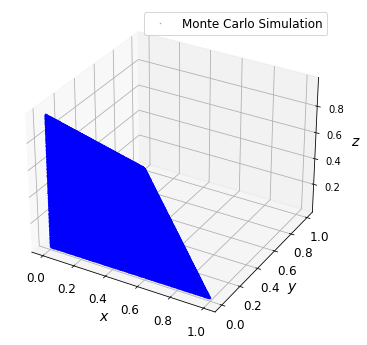

In [7]:
# グラフの各種設定
fig = plt.figure(
    figsize = (8, 6),
    facecolor = "white",
    edgecolor = "black",
)
# グラフの出力位置の設定
ax = fig.add_subplot(111, projection='3d')
# グラフのプロット
ax.plot(result_array[:, 0], result_array[:, 1], result_array[:, 2], ".", label = r'Monte Carlo Simulation', color = 'blue', markersize = 1.0, alpha = 0.4)
# グラフの指数表示
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
# 軸目盛のフォントサイズの変更
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
# 軸ラベルの設定
#ax.set_xscale("log")
ax.set_xlabel(r"$x$", fontsize = 14)
ax.set_ylabel(r"$y$", fontsize = 14)
ax.set_zlabel(r"$z$", fontsize = 14)
# 凡例の設定
ax.legend(loc = 'upper right', fontsize = 12)

In [9]:
time = datetime.datetime.now(pytz.timezone('Asia/Tokyo'))
#(年、月、日付、時、分、秒、マイクロ秒)

#見やすい形に変換
time = time.strftime('%m%d_monte_1011kadai_1-3.png')
# 図の保存
fig.savefig(time, facecolor = fig.get_facecolor())